In [1]:
import pandas as pd
data= pd.read_excel(r'C:\Users\Nipun Khare\Desktop\Workbooks\FPcomment_Combined.xlsx')

In [2]:
anti= pd.read_csv(r'C:\Users\Nipun Khare\Desktop\Workbooks\anti.txt')

In [3]:
type(anti)

pandas.core.frame.DataFrame

In [4]:
antii= list(anti)
antii= [string.replace(' ', '') for string in antii]

In [5]:
support= pd.read_csv(r'C:\Users\Nipun Khare\Desktop\Workbooks\support.txt')
pro= list(support)
pro
pro= [string.replace(' ', '') for string in pro]

In [6]:
data['comments']= data['comments'].map(str)

In [7]:
from nltk.tokenize import word_tokenize
data['tokenized_text'] = data['comments'].apply(word_tokenize)

In [8]:
data.head()

,comments,tokenized_text
0,"At Singhu border, protesting farmers from Punj...","[At, Singhu, border, ,, protesting, farmers, f..."
1,Sikh are peaceful community we respect them fr...,"[Sikh, are, peaceful, community, we, respect, ..."
2,Every citizen has a right to say I support you...,"[Every, citizen, has, a, right, to, say, I, su..."
3,Nihangs are disciplined warriors of our sikh c...,"[Nihangs, are, disciplined, warriors, of, our,..."
4,Dil jeet liya Nihang Sikh ne,"[Dil, jeet, liya, Nihang, Sikh, ne]"


In [9]:
from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()

In [10]:
def support(sentence):
    
    pros= 0
    
    words = [word.lower() for word in tokenizer.tokenize(sentence)]
    for word in words:
        
        if word in pro:
            pros= pros+1
        else:
            pros= pros+0
             
    return pros

def anti(sentence):
    
    antis=0
    words = [word.lower() for word in tokenizer.tokenize(sentence)]
    for word in words:
        
             if word in antii:
            antis= antis+1
    return antis

In [11]:
data['support_count']= data['comments'].apply(support)
data['anti_count']= data['comments'].apply(anti)

In [12]:
data.head()

,comments,tokenized_text,support_count,anti_count
0,"At Singhu border, protesting farmers from Punj...","[At, Singhu, border, ,, protesting, farmers, f...",13,7
1,Sikh are peaceful community we respect them fr...,"[Sikh, are, peaceful, community, we, respect, ...",4,0
2,Every citizen has a right to say I support you...,"[Every, citizen, has, a, right, to, say, I, su...",2,0
3,Nihangs are disciplined warriors of our sikh c...,"[Nihangs, are, disciplined, warriors, of, our,...",2,0
4,Dil jeet liya Nihang Sikh ne,"[Dil, jeet, liya, Nihang, Sikh, ne]",1,0


In [13]:
data['sentiment']= sum([data['support_count']> data.anti_count])

In [14]:
data.head()

,comments,tokenized_text,support_count,anti_count,sentiment
0,"At Singhu border, protesting farmers from Punj...","[At, Singhu, border, ,, protesting, farmers, f...",13,7,1
1,Sikh are peaceful community we respect them fr...,"[Sikh, are, peaceful, community, we, respect, ...",4,0,1
2,Every citizen has a right to say I support you...,"[Every, citizen, has, a, right, to, say, I, su...",2,0,1
3,Nihangs are disciplined warriors of our sikh c...,"[Nihangs, are, disciplined, warriors, of, our,...",2,0,1
4,Dil jeet liya Nihang Sikh ne,"[Dil, jeet, liya, Nihang, Sikh, ne]",1,0,1


In [15]:
data.tail()

,comments,tokenized_text,support_count,anti_count,sentiment
6946,Indian Left is connected to the same groups th...,"[Indian, Left, is, connected, to, the, same, g...",12,7,1
6947,Banker has so many regulators today . RBI deci...,"[Banker, has, so, many, regulators, today, ., ...",3,0,1
6948,She is bookish & ppt minister . No Knowledge o...,"[She, is, bookish, &, ppt, minister, ., No, Kn...",4,0,1
6949,farmers- political nexus prolong and complica...,"[farmers-, political, nexus, prolong, and, com...",5,5,0
6950,Arnab...y do u put yr opinion all the time n n...,"[Arnab, ..., y, do, u, put, yr, opinion, all, ...",1,1,0


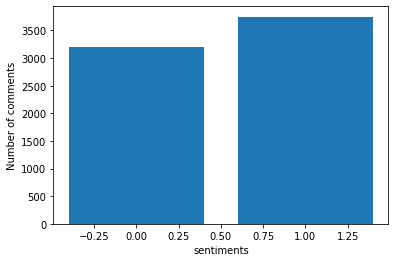

In [17]:
import matplotlib.pyplot as plt
Sentiment_count=data.groupby('sentiment').count()

plt.bar(Sentiment_count.index.values, Sentiment_count['comments'])

plt.xlabel('sentiments')
plt.ylabel('Number of comments')

plt.show()

In [18]:
import seaborn as sns

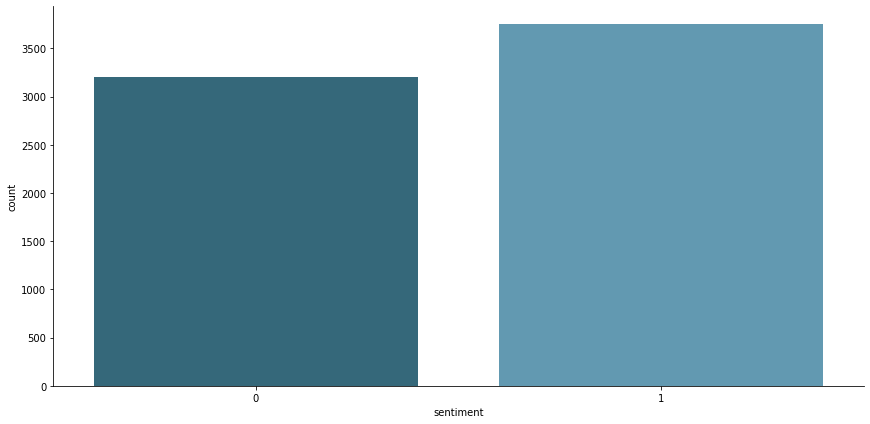

In [22]:
sns.factorplot(x="sentiment", data=data, kind="count", size=6, aspect=2, palette="PuBuGn_d")
plt.show()

In [23]:
!pip install gensim

  Created wheel for smart-open: filename=smart_open-4.0.1-cp37-none-any.whl size=108255 sha256=56e350fdea57b6a31f66080fa8748dbb553f421708b33c140b84344c9a2851cf
  Stored in directory: C:\Users\Nipun Khare\AppData\Local\pip\Cache\wheels\ce\2e\f2\edb1bbf046cfa865406b6d62f56bb9ae9052fa53b29648fb39
Successfully built smart-open
  Found existing installation: Cython 0.29.13
    Uninstalling Cython-0.29.13:
      Successfully uninstalled Cython-0.29.13


In [31]:
!pip install sumy

  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13709 sha256=655b4a3fa0c3249d148e1b5042b2afcca6eedb2698e2d6768ed6e9fca91dc02d
  Stored in directory: C:\Users\Nipun Khare\AppData\Local\pip\Cache\wheels\9b\04\dd\7daf4150b6d9b12949298737de9431a324d4b797ffd63f526e
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=21687 sha256=fc40526a6c0a19cc2c909fdd7c567c778d055c7e290f87a378c1ca5bfc9b7f05
  Stored in directory: C:\Users\Nipun Khare\AppData\Local\pip\Cache\wheels\5a\4d\a1\510b12c5e65e0b2b3ce539b2af66da0fc57571e528924f4a52
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746871 sha256=65750c5944bdad752b7ec88c73de0d1fe304944223aef226e269788a75a87901
  Stored in directory: C:\Users\Nipun Khare\AppData\Local\pip\Cache\wheels\33\4e\a6\be297e6b83567e537bed9df4a93f8590ec01c1acfbcd405348
Successfully built docopt breadability pycountry


In [32]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer

# Creating text parser using tokenization
parser = PlaintextParser.from_string(data,Tokenizer("english"))

from sumy.summarizers.text_rank import TextRankSummarizer

# Summarize using sumy TextRank
summarizer = TextRankSummarizer()
summary =summarizer(parser.document,2)

text_summary=""
for sentence in summary:
    text_summary+=str(sentence)

print(text_summary)

comments  \ 0     At Singhu border, protesting farmers from Punj... 1     Sikh are peaceful community we respect them fr... 2     Every citizen has a right to say I support you... 3     Nihangs are disciplined warriors of our sikh c... 4                          Dil jeet liya Nihang Sikh ne ...                                                 ... 6946  Indian Left is connected to the same groups th... 6947  Banker has so many regulators today .tokenized_text  support_count  \ 0     [At, Singhu, border, ,, protesting, farmers, f...             13 1     [Sikh, are, peaceful, community, we, respect, ...              4 2     [Every, citizen, has, a, right, to, say, I, su...              2 3     [Nihangs, are, disciplined, warriors, of, our,...              2 4                   [Dil, jeet, liya, Nihang, Sikh, ne]              1 ...                                                 ...            ... 6946  [Indian, Left, is, connected, to, the, same, g...             12 6947  [Banker, has, so,

In [33]:
from sumy.summarizers.lex_rank import LexRankSummarizer
summarizer_lex = LexRankSummarizer()

# Summarize using sumy LexRank
summary= summarizer_lex(parser.document, 2)
lex_summary=""

for sentence in summary:
    lex_summary+=str(sentence)  
print(lex_summary)

tokenized_text  support_count  \ 0     [At, Singhu, border, ,, protesting, farmers, f...             13 1     [Sikh, are, peaceful, community, we, respect, ...              4 2     [Every, citizen, has, a, right, to, say, I, su...              2 3     [Nihangs, are, disciplined, warriors, of, our,...              2 4                   [Dil, jeet, liya, Nihang, Sikh, ne]              1 ...                                                 ...            ... 6946  [Indian, Left, is, connected, to, the, same, g...             12 6947  [Banker, has, so, many, regulators, today, ., ...              3 6948  [She, is, bookish, &, ppt, minister, ., No, Kn...              4 6949  [farmers-, political, nexus, prolong, and, com...              5 6950  [Arnab, ..., y, do, u, put, yr, opinion, all, ...              1anti_count  sentiment 0              7          1 1              0          1 2              0          1 3              0          1 4              0          1 ...          ...        .

In [34]:
from sumy.summarizers.lsa import LsaSummarizer
summarizer_lsa = LsaSummarizer()

# Summarize using sumy LSA
summary =summarizer_lsa(parser.document,2)

lsa_summary=""
for sentence in summary:
    lsa_summary+=str(sentence)  

print(lsa_summary)

comments  \ 0     At Singhu border, protesting farmers from Punj... 1     Sikh are peaceful community we respect them fr... 2     Every citizen has a right to say I support you... 3     Nihangs are disciplined warriors of our sikh c... 4                          Dil jeet liya Nihang Sikh ne ...                                                 ... 6946  Indian Left is connected to the same groups th... 6947  Banker has so many regulators today .tokenized_text  support_count  \ 0     [At, Singhu, border, ,, protesting, farmers, f...             13 1     [Sikh, are, peaceful, community, we, respect, ...              4 2     [Every, citizen, has, a, right, to, say, I, su...              2 3     [Nihangs, are, disciplined, warriors, of, our,...              2 4                   [Dil, jeet, liya, Nihang, Sikh, ne]              1 ...                                                 ...            ... 6946  [Indian, Left, is, connected, to, the, same, g...             12 6947  [Banker, has, so,

In [36]:
from sumy.summarizers.kl import KLSummarizer

summarizer_kl = KLSummarizer()

# Summarize using sumy KL Divergence
summary =summarizer_kl(parser.document,3)

kl_summary=""
for sentence in summary:
    kl_summary+=str(sentence)  
print(kl_summary)


RBI deci... 6948  She is bookish & ppt minister .No Knowledge o... 6949  farmers- political nexus  prolong and complica... 6950  Arnab...y do u put yr opinion all the time n n...[6951 rows x 5 columns]
